# Characterizing the loss surface

For convex functions, gradient descent has strong guarantees of converging. However, the loss surface of neural networks
are generally nonconvex. Clever dimensionality reduction techniques allow us to visualize loss function curvature despite the very large number of parameters ({numref}`02-visualizing-loss` from {cite}`visualizing_loss`). Notice that there are **plateaus** (or flat minimas) and **local minimas** which makes gradient descent hard. In high-dimension **saddle points** are the most common critical points.

<br>

```{figure} ../../../img/nn/02-visualizing-loss.png
---
name: 02-visualizing-loss
width: 80%
align: center
---
The loss surfaces of ResNet-56 with (**right**) and without (**left**) skip connections. 
The loss surface on the right looks better although there are still some flatness. {cite}`visualizing_loss`
```

```{figure} ../../../img/nn/02-optima-type.png
---
name: 02-optima-type
width: 100%
align: center
---
Types of critical points. [Source](https://cs182sp21.github.io/static/slides/lec-4.pdf)
```

## Local minima

Local minimas are very scary, in principle, since gradient descent could converge to a
solution that is *arbitrarily worse* than the global optimum. Surprisingly, this becomes 
less of an issue as the number of parameters increases, as they 
tend to be not much worse than global optima. {numref}`02-local-minima`
below shows that for larger networks the test loss variance between training 
runs become
smaller. This indicates that local minima tend to be increasingly equivalent 
as we increase network size.

```{figure} ../../../img/nn/02-local-minima.png
---
name: 02-local-minima
width: 80%
align: center
---
Test loss of 1000 networks on a scaled-down version of MNIST, where
each image was downsampled to size 10×10. The networks have one hidden layer
and with 25, 50, 100, 250, and 500 hidden units, 
each one starting from a random set of parameters sampled uniformly within the unit cube. 
All networks were trained for 200 epochs using SGD with
learning rate decay. Source: {cite}`pmlr-v38-choromanska15`
```

## Plateaus

Plateaus are regions in the loss landscape with small gradients. It can also be a flat local minima. Below the initial weights is in a plateau, and the optimizer with small learning rate gets stuck and fails to converge. Large learning rate allows the optimizer to escape such regions. As such, we cannot simply choose small learning rate to prevent oscillations.

In [1]:
from chapter import *

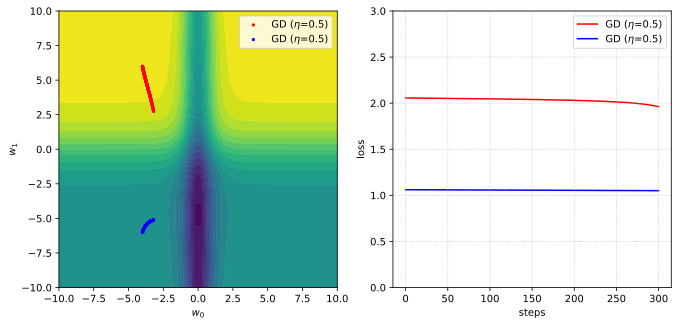

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
plot_gd_steps(ax, optim=GD, optim_params={"lr": 0.5}, w_init=[-4.0,  6.0], label_map={"lr": r"$\eta$"}, color="red")
plot_gd_steps(ax, optim=GD, optim_params={"lr": 0.5}, w_init=[-4.0, -6.0], label_map={"lr": r"$\eta$"}, color="blue")

ax[1].set_ylim(0, 3)
ax[0].legend()
ax[1].legend();

## Saddle points

Saddle points are critical points (i.e. gradient zero) that are local minimum in some dimensions but local maximum in other dimensions. Neural networks have a lot of symmetry which can result in exponentially many local minima. Saddle points naturally arise
in paths that connect these local minima ({numref}`02-connected-minima`). 
It takes a long time to escape a saddle point since it is usually surrounded by high-loss plateaus {cite}`dauphin2014`.
A saddle point looks like a special structure. But in high-dimension, it turns out that most optima are saddle points.

```{figure} ../../../img/nn/02-connected-minima.png
---
name: 02-connected-minima
width: 60%
align: center
---
Paths between two minimas result in a saddle point. [Source](https://www.offconvex.org/2016/03/22/saddlepoints/)
```

The Hessian $\boldsymbol{\mathsf{H}}$ at the critical point of a surface is a matrix containing second derivatives at that point. We will see shortly that these characterize the local curvature. From [Schwarz's theorem](https://en.wikipedia.org/wiki/Symmetry_of_second_derivatives#Schwarz's_theorem), mixed partials are equal assuming the second partial derivatives are continuous around the optima. It follows that $\boldsymbol{\mathsf{H}}$ is symmetric, and from the [Real Spectral Theorem](https://github.com/particle1331/computational-linear-algebra/blob/master/chapters/02-svd.ipynb), $\boldsymbol{\mathsf{H}}$ is diagonalizable with real eigenvalues. It turns out that local curvature is characterized by whether the eigenvalues are negative, zero, or positive.

If all eigenvalues of the Hessian are positive, it is [positive-definite](https://en.wikipedia.org/wiki/Definite_matrix), i.e. $\boldsymbol{\mathsf{x}}^\top \boldsymbol{\mathsf{H}}\, \boldsymbol{\mathsf{x}} > 0$ for $\boldsymbol{\mathsf{x}} \neq \boldsymbol{0}.$ This follows directly from the spectral decomposition $\boldsymbol{\mathsf{H}} = \boldsymbol{\mathsf{U}} \boldsymbol{\Lambda} \boldsymbol{\mathsf{U}}^\top$ such that $\boldsymbol{\Lambda}$ is the diagonal matrix of eigenvalues of $\boldsymbol{\mathsf{H}}$ and $\boldsymbol{\mathsf{U}}$ is an orthogonal matrix with corresponding unit eigenvectors as columns. This is the multivariable equivalent of **concave up**. On the other hand, if all eigenvalues of $\boldsymbol{\mathsf{H}}$ are negative, then it is negative-definite or **concave down**. To see this, observe that the Taylor expansion at the critical point is:

$$
\Delta \mathcal{L}_{\mathcal{D}} = \frac{1}{2} \Delta \boldsymbol{\Theta}^\top \boldsymbol{\mathsf{H}}\, \Delta \boldsymbol{\Theta} + O(\Delta \boldsymbol{\Theta}^3).
$$

If any eigenvalue is zero, more information is needed (i.e. we need third order terms). Finally, if the eigenvalues are mixed, we get a **saddle point** where there are orthogonal directions corresponding to eigenvectors where the loss decreases and directions where the loss increases. Getting $M = |\boldsymbol{\Theta}|$ eigenvalues of the same sign or having one zero eigenvalue is relatively rare for large networks with complex loss surfaces, so that the probability that the critical point is a saddle point is high.